In [1]:
import os
import glob
from osgeo import gdal
import rasterio
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [2]:
#Reading Images
image_names = glob.glob(r'Test Data/Images/*.tif')
print(image_names)

['Test Data/Images/img1043.tif', 'Test Data/Images/img138.tif', 'Test Data/Images/img559.tif', 'Test Data/Images/img588.tif', 'Test Data/Images/img377.tif', 'Test Data/Images/img716.tif', 'Test Data/Images/img401.tif', 'Test Data/Images/img873.tif', 'Test Data/Images/img144.tif', 'Test Data/Images/img282.tif', 'Test Data/Images/img46.tif', 'Test Data/Images/img957.tif', 'Test Data/Images/img525.tif', 'Test Data/Images/img253.tif', 'Test Data/Images/img986.tif', 'Test Data/Images/img97.tif', 'Test Data/Images/img632.tif', 'Test Data/Images/img195.tif', 'Test Data/Images/img143.tif', 'Test Data/Images/img1038.tif', 'Test Data/Images/img41.tif', 'Test Data/Images/img522.tif', 'Test Data/Images/img950.tif', 'Test Data/Images/img285.tif', 'Test Data/Images/img981.tif', 'Test Data/Images/img90.tif', 'Test Data/Images/img254.tif', 'Test Data/Images/img192.tif', 'Test Data/Images/img635.tif', 'Test Data/Images/img808.tif', 'Test Data/Images/img698.tif', 'Test Data/Images/img1044.tif', 'Test Da

In [3]:
image_names.sort()
print(image_names)

['Test Data/Images/img1.tif', 'Test Data/Images/img10.tif', 'Test Data/Images/img100.tif', 'Test Data/Images/img1000.tif', 'Test Data/Images/img1001.tif', 'Test Data/Images/img1002.tif', 'Test Data/Images/img1003.tif', 'Test Data/Images/img1004.tif', 'Test Data/Images/img1005.tif', 'Test Data/Images/img1006.tif', 'Test Data/Images/img1007.tif', 'Test Data/Images/img1008.tif', 'Test Data/Images/img1009.tif', 'Test Data/Images/img101.tif', 'Test Data/Images/img1010.tif', 'Test Data/Images/img1011.tif', 'Test Data/Images/img1012.tif', 'Test Data/Images/img1013.tif', 'Test Data/Images/img1014.tif', 'Test Data/Images/img1015.tif', 'Test Data/Images/img1016.tif', 'Test Data/Images/img1017.tif', 'Test Data/Images/img1018.tif', 'Test Data/Images/img1019.tif', 'Test Data/Images/img102.tif', 'Test Data/Images/img1020.tif', 'Test Data/Images/img1021.tif', 'Test Data/Images/img1022.tif', 'Test Data/Images/img1023.tif', 'Test Data/Images/img1024.tif', 'Test Data/Images/img1025.tif', 'Test Data/Imag

In [4]:
print(len(image_names))

1080


In [5]:
images_names_ = [gdal.Open(img).ReadAsArray() for img in image_names]

In [6]:
image_dataset = np.array(images_names_)

In [7]:
# image_dataset_ = np.asarray(image_dataset, dtype=int)
image_dataset_ = np.asarray(image_dataset, dtype='int8')

In [8]:
image_dataset_

array([[[[ -72,  -96, -104, ...,  -73,  -63,  -64],
         [-106,  -83,  -92, ...,  -55,  -58,  -61],
         [-115,  -86,  -69, ...,  -59,  -61,  -60],
         ...,
         [-114, -116, -115, ..., -120, -118, -117],
         [-116, -115, -115, ..., -118, -117, -118],
         [-117, -113, -116, ..., -118, -118, -118]],

        [[ -82, -103, -111, ..., -106, -100, -102],
         [-114,  -91,  -99, ...,  -88,  -96,  -99],
         [-123,  -95,  -78, ...,  -93,  -98,  -98],
         ...,
         [-124, -126, -125, ..., -127, -124, -124],
         [-126, -126, -126, ..., -124, -123, -125],
         [-127, -123, -126, ..., -125, -124, -125]],

        [[ -83, -104, -112, ..., -106, -100, -104],
         [-116,  -92, -100, ...,  -89,  -97, -101],
         [-123,  -95,  -78, ...,  -93, -100, -101],
         ...,
         [ 126,  124,  125, ...,  126, -128, -128],
         [ 123,  125,  125, ..., -128, -127,  127],
         [ 123,  126,  124, ..., -128, -128,  127]],

        [[  69, 

In [9]:
image_dataset_.shape

(1080, 5, 512, 512)

In [10]:
image_dataset_.dtype

dtype('int8')

In [11]:
#Reading Masks

mask_names = glob.glob(r'Test Data/masks/*.tif')
print(mask_names)

['Test Data/masks/mask545.tif.tif', 'Test Data/masks/mask492.tif.tif', 'Test Data/masks/mask277.tif.tif', 'Test Data/masks/mask350.tif.tif', 'Test Data/masks/mask287.tif.tif', 'Test Data/masks/mask628.tif.tif', 'Test Data/masks/mask462.tif.tif', 'Test Data/masks/mask354.tif.tif', 'Test Data/masks/mask466.tif.tif', 'Test Data/masks/mask283.tif.tif', 'Test Data/masks/mask541.tif.tif', 'Test Data/masks/mask848.tif.tif', 'Test Data/masks/mask273.tif.tif', 'Test Data/masks/mask496.tif.tif', 'Test Data/masks/mask624.tif.tif', 'Test Data/masks/mask23.tif.tif', 'Test Data/masks/mask116.tif.tif', 'Test Data/masks/mask967.tif.tif', 'Test Data/masks/mask2.tif.tif', 'Test Data/masks/mask840.tif.tif', 'Test Data/masks/mask1007.tif.tif', 'Test Data/masks/mask703.tif.tif', 'Test Data/masks/mask549.tif.tif', 'Test Data/masks/mask997.tif.tif', 'Test Data/masks/mask6.tif.tif', 'Test Data/masks/mask1003.tif.tif', 'Test Data/masks/mask844.tif.tif', 'Test Data/masks/mask993.tif.tif', 'Test Data/masks/mask7

In [12]:
mask_names.sort()
print(mask_names)

['Test Data/masks/mask1.tif.tif', 'Test Data/masks/mask10.tif.tif', 'Test Data/masks/mask100.tif.tif', 'Test Data/masks/mask1000.tif.tif', 'Test Data/masks/mask1001.tif.tif', 'Test Data/masks/mask1002.tif.tif', 'Test Data/masks/mask1003.tif.tif', 'Test Data/masks/mask1004.tif.tif', 'Test Data/masks/mask1005.tif.tif', 'Test Data/masks/mask1006.tif.tif', 'Test Data/masks/mask1007.tif.tif', 'Test Data/masks/mask1008.tif.tif', 'Test Data/masks/mask1009.tif.tif', 'Test Data/masks/mask101.tif.tif', 'Test Data/masks/mask1010.tif.tif', 'Test Data/masks/mask1011.tif.tif', 'Test Data/masks/mask1012.tif.tif', 'Test Data/masks/mask1013.tif.tif', 'Test Data/masks/mask1014.tif.tif', 'Test Data/masks/mask1015.tif.tif', 'Test Data/masks/mask1016.tif.tif', 'Test Data/masks/mask1017.tif.tif', 'Test Data/masks/mask1018.tif.tif', 'Test Data/masks/mask1019.tif.tif', 'Test Data/masks/mask102.tif.tif', 'Test Data/masks/mask1020.tif.tif', 'Test Data/masks/mask1021.tif.tif', 'Test Data/masks/mask1022.tif.tif',

In [13]:
print(len(mask_names))

1080


In [14]:
mask_names_ = [gdal.Open(mask).ReadAsArray() for mask in mask_names]

In [15]:
mask_dataset = np.array(mask_names_)

In [16]:
# mask_dataset_ = np.asarray(mask_dataset, dtype = int)
mask_dataset_ = np.asarray(mask_dataset, dtype = 'int8')

In [17]:
mask_dataset_

array([[[  0,   0,   0, ...,  -2,  -2,  -2],
        [  0,   0,   0, ...,  -2,  -2,  -2],
        [  0,   0,   0, ...,  -2,  -2,  -2],
        ...,
        [  0,   0,   0, ..., 127, 127, 127],
        [  0,   0,   0, ..., 127, 127, 127],
        [  0,   0,   0, ..., 127, 127, 127]],

       [[127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        ...,
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2]],

       ...,

       [[ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2

In [18]:
mask_dataset_.dtype

dtype('int8')

In [19]:
_mask_dataset_ = np.copy(mask_dataset_) #Make a copy

In [20]:
_mask_dataset_[_mask_dataset_ == -2] = 0

In [21]:
#Maximum and Minimum value in images
print(np.nanmax(image_dataset_))
print(np.nanmin(image_dataset_))

127
-128


In [22]:
#Maximum and Minimum value in Masks
print(np.nanmax(_mask_dataset_))
print(np.nanmin(_mask_dataset_))

127
0


In [23]:
#Labels in the mask are
np.unique(_mask_dataset_)

array([  0, 127], dtype=int8)

In [24]:
print(image_dataset_.shape)
print(_mask_dataset_.shape)

(1080, 5, 512, 512)
(1080, 512, 512)


In [25]:
# Dimension expanding
new_image_dataset = np.expand_dims(image_dataset_, axis = 4)
new_mask_dataset = np.expand_dims(_mask_dataset_, axis = 3)

In [26]:
#Check shape of images and mask 
print(new_image_dataset.shape)
print(new_mask_dataset.shape)

(1080, 5, 512, 512, 1)
(1080, 512, 512, 1)


In [27]:
#Normalize images
new_image_dataset_ = new_image_dataset /127.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
new_mask_dataset_ = new_mask_dataset /np.max(new_mask_dataset)  #Pixel values will be 0 or 1

In [28]:
#Maximum in image dataset and unique value in mask dataset after normalization 
print(np.nanmax(new_image_dataset_))
print(np.nanmin(new_image_dataset_))
print(np.unique(new_mask_dataset_))

1.0
-1.0078740157480315
[0. 1.]


In [29]:
print(new_image_dataset_.dtype)
print(new_mask_dataset_.dtype)

float64
float64


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#Training and Testing Splitting
X_train, X_test, y_train, y_test = train_test_split(new_image_dataset_, new_mask_dataset_, test_size = 0.20, random_state = 42)

In [32]:
#Checking shape of training testing images and masks
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(864, 5, 512, 512, 1)
(864, 512, 512, 1)
(216, 5, 512, 512, 1)
(216, 512, 512, 1)


In [33]:
#Checking data type of training testing images and masks
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


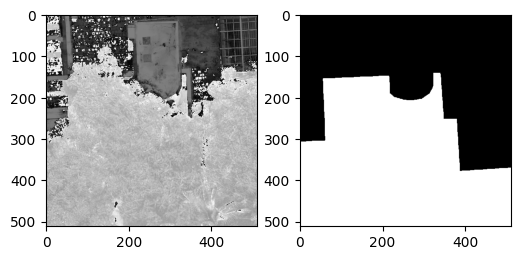

In [34]:
#Sanity check, view few images and masks
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,2,:,:], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [35]:
X_train_ = np.transpose(X_train, (0, 2, 3, 1, 4))
X_test_ = np.transpose(X_test, (0, 2, 3, 1, 4))
print(X_train_.shape)
print(X_test_.shape)

(864, 512, 512, 5, 1)
(216, 512, 512, 5, 1)


In [36]:
#Unet Implementation
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import keras
from keras.utils import normalize
from tensorflow.keras.metrics import MeanIoU
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K

In [37]:
from keras.layers import Input
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation, Reshape
from keras.models import Model

In [38]:
from tensorflow.keras.layers import Input, Conv2D, Convolution2D, BatchNormalization, Activation, MaxPool2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Concatenate, ZeroPadding2D, Dropout, Lambda
from tensorflow.keras.models import Model
from keras.layers import Activation, MaxPool2D, Concatenate

In [39]:
from keras_preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.layers import Layer
import argparse

In [40]:
# from keras.applications import ResNet50, vgg16, inception_v3, mobilenet
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.vgg16 import VGG16, Resnet50
# from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [41]:
non_building_pixels = np.count_nonzero(new_mask_dataset_ == 0)
building_pixels = np.count_nonzero(new_mask_dataset_ == 1)

In [42]:
print(non_building_pixels)
print(building_pixels)

137052834
146062686


In [43]:
total_pixels = building_pixels + non_building_pixels
building_weight = (total_pixels / building_pixels) * 0.7
nonbuilding_weight = (total_pixels / non_building_pixels) * 0.3
class_weights = [nonbuilding_weight, building_weight]

In [44]:
print([nonbuilding_weight, building_weight])

[0.6197219971387092, 1.3568206187855534]


In [45]:
def weighted_binary_crossentropy(nonbuilding_weight, building_weight):
    
    def loss(y_train, y_test):
        
        # Original binary crossentropy (see losses.py):
        # tf.keras.backend.mean(tf.keras.backend.binary_crossentropy(y_true, y_pred), axis=-1)
        
        # Calculate the binary crossentropy
        b_ce = tf.keras.backend.binary_crossentropy(y_train, y_test)

        # Apply the weights
        weight_vector = y_train * building_weight + (1. - y_train) * nonbuilding_weight
        weighted_b_ce = weight_vector * b_ce
        
        # Return the mean error
        return tf.keras.backend.mean(weighted_b_ce)
        
    return loss

In [46]:
#W_BCE loss function based on mean of two classes
loss_function = weighted_binary_crossentropy(nonbuilding_weight, building_weight)

In [ ]:
""" Building I-UNET using Transfer learning"""

In [47]:
# Build InceptionV3 for 512 x 512 x 5 channels 
#Import Inception model by not defining an input shape 

inception_model = InceptionV3(include_top=False, weights='imagenet')
print(inception_model.summary())

2023-04-14 07:48:57.903281: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

In [48]:
#Get the dictionary of config for resnet50
inception_config = inception_model.get_config()

In [49]:
# Change the input shape to new desired shape
h, w, c = 512, 512, 5
inception_config["layers"][0]["config"]["batch_input_shape"] = (None, h, w, c)

In [50]:
#Create new model with the updated configuration
inception_updated = Model.from_config(inception_config)
print(inception_updated.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  1440        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [51]:
# Check Weights of first conv layer in the original model...
orig_model_conv1_block1_wts = inception_model.layers[1].get_weights()[0]

print(orig_model_conv1_block1_wts[:,:,0,0])
print(orig_model_conv1_block1_wts[:,:,1,0])
print(orig_model_conv1_block1_wts[:,:,2,0])

[[-0.45910555 -0.75126916 -0.07530744]
 [-0.30967137 -0.55001074 -0.06132052]
 [ 0.16115063  0.04062082  0.08363139]]
[[0.31637633 0.35581657 0.11293176]
 [0.18523026 0.19094716 0.04152641]
 [0.06393196 0.03313763 0.11437388]]
[[ 0.22171251  0.51100105 -0.07296094]
 [ 0.16024701  0.36926833 -0.02629304]
 [-0.22752108 -0.0536594  -0.19414912]]


In [52]:
# Check Weights of first conv layer in the new model...
new_model_conv1_block1_wts = inception_updated.layers[1].get_weights()[0]
print(new_model_conv1_block1_wts[:,:,0,0])
print(new_model_conv1_block1_wts[:,:,1,0])
print(new_model_conv1_block1_wts[:,:,2,0])
print(new_model_conv1_block1_wts[:,:,3,0])
print(new_model_conv1_block1_wts[:,:,4,0])
#Random weights....

[[ 0.09269837  0.01953287 -0.0537622 ]
 [ 0.02946143 -0.12738006  0.02269217]
 [ 0.0464894  -0.10833485 -0.08480474]]
[[ 0.02370922 -0.00126125 -0.03543895]
 [-0.12856159 -0.09961736  0.10383603]
 [ 0.03188257 -0.0616556  -0.01624659]]
[[-0.09656692 -0.11167006  0.05290067]
 [-0.04388857  0.06689219  0.0676199 ]
 [-0.05173041  0.00204743  0.10837488]]
[[ 0.12823224 -0.10962646  0.08754224]
 [ 0.12129152 -0.0836532   0.01648885]
 [-0.0021918  -0.04832312 -0.11832798]]
[[ 0.00722885 -0.10551997  0.03690003]
 [-0.00353898  0.11795735  0.08511117]
 [-0.07996035 -0.00665337 -0.04175267]]


In [53]:
def avg_and_copy_wts(weights, num_channels_to_fill):  
    average_weights = np.mean(weights, axis=-2).reshape(weights[:,:,-1:,:].shape)  
    wts_copied_to_mult_channels = np.tile(average_weights, (num_channels_to_fill, 1)) 
    return(wts_copied_to_mult_channels)

In [54]:
inception_updated_config = inception_updated.get_config()
inception_updated_layer_names = [inception_updated_config['layers'][x]['name'] for x in range(len(inception_updated_config['layers']))]

In [55]:
first_conv_name = inception_updated_layer_names[1]
print(first_conv_name)

conv2d


In [56]:
for layer in inception_model.layers:
    if layer.name in inception_updated_layer_names:
     
      if layer.get_weights() != []:  
        target_layer = inception_updated.get_layer(layer.name)
    
        if layer.name in first_conv_name:    
            weights = layer.get_weights()[0]
            # biases  = layer.get_weights()[1]
    
            weights_extra_channels = np.concatenate((weights,   
                                                    avg_and_copy_wts(weights, c - 3)),  
                                                    axis=-2)
                                                  
            target_layer.set_weights([weights_extra_channels])  
            target_layer.trainable = False  
    
        else:
            target_layer.set_weights(layer.get_weights()) 
            target_layer.trainable = False

In [57]:
# Check Weights of first conv layer in the new model...
#Compare against the original model weights
new_model_conv1_block1_wts_updated = inception_updated.layers[1].get_weights()[0]
print(new_model_conv1_block1_wts_updated[:,:,0,0])
print(new_model_conv1_block1_wts_updated[:,:,1,0])
print(new_model_conv1_block1_wts_updated[:,:,2,0])
print(new_model_conv1_block1_wts_updated[:,:,3,0])
print(new_model_conv1_block1_wts_updated[:,:,4,0])

[[-0.45910555 -0.75126916 -0.07530744]
 [-0.30967137 -0.55001074 -0.06132052]
 [ 0.16115063  0.04062082  0.08363139]]
[[0.31637633 0.35581657 0.11293176]
 [0.18523026 0.19094716 0.04152641]
 [0.06393196 0.03313763 0.11437388]]
[[ 0.22171251  0.51100105 -0.07296094]
 [ 0.16024701  0.36926833 -0.02629304]
 [-0.22752108 -0.0536594  -0.19414912]]
[[ 0.02632776  0.03851615 -0.01177887]
 [ 0.0119353   0.00340159 -0.01536239]
 [-0.00081283  0.00669968  0.00128538]]
[[ 0.02632776  0.03851615 -0.01177887]
 [ 0.0119353   0.00340159 -0.01536239]
 [-0.00081283  0.00669968  0.00128538]]


In [58]:
print(inception_updated.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  1440        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [59]:
inception_updated.layers[-311].output

<KerasTensor: shape=(None, 512, 512, 5) dtype=float32 (created by layer 'input_1')>

In [60]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    # x = Conv2D(num_filters, 3, padding="same")(x)
    # x = Dropout(0.5)(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    
    # x = Conv2D(num_filters, 3, padding="same")(x)
    # x = Dropout(0.5)(x)
    # x = BatchNormalization()(x)
    # x = Activation("relu")(x)
    
    return x

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [61]:
def build_inception_unet(input_shape):
    """ Input """
    input_shape = inception_updated.layers[-311].output
    inputs = input_shape
    
    """ Encoder from Pre-trained inception updated Model """
    """ Skip connection """

    s1 = inception_updated.get_layer("input_1").output           ## (512 x 512) 

    s2 = inception_updated.get_layer("activation").output     ## (255 x 255) 32
    s2 = ZeroPadding2D(( (1, 0), (1, 0) ))(s2)                   ## (256 x 256) 

    s3 = inception_updated.get_layer("activation_3").output     ## (126 x 126) 64
    s3 = ZeroPadding2D((1, 1))(s3)                               ## (128 x 128)

    s4 = inception_updated.get_layer("activation_28").output    ## (61 x 61)
    s4 = ZeroPadding2D(( (2, 1),(2, 1) ))(s4)                    ## (64 x 64)

    print(s1.shape, s2.shape, s3.shape, s4.shape)
    
    """ Bridge """
    b1 = inception_updated.get_layer("activation_74").output     ## (30 x 30)
    b1 = ZeroPadding2D((1, 1))(b1)                                ## (32 x 32)
    print(b1.shape)

    """ Decoder """
    d1 = decoder_block(b1, s4, 256)                     ## (64 x 64)
    d2 = decoder_block(d1, s3, 128)                     ## (128 x 128)
    d3 = decoder_block(d2, s2, 64)                     ## (256 x 256)
    d4 = decoder_block(d3, s1, 32)                      ## (512 x 512)

    """ Output """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)
    
    model = Model(inputs = inputs, outputs = outputs, name = "I-UNet")
    return model

if __name__ == "__main__":
    input_shape = inception_updated.layers[-311].output
    model = build_inception_unet(input_shape)
    model.summary()

(None, 512, 512, 5) (None, 256, 256, 32) (None, 128, 128, 80) (None, 64, 64, 96)
(None, 32, 32, 192)
Model: "I-UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  1440        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']          

In [61]:
# from keras.utils import plot_model

In [ ]:
# keras.utils.plot_model(model, "I-UNet_14L_TP.png", show_shapes=True)

In [ ]:
# pip install keras-lr-finder

In [ ]:
# import math
# from keras.callbacks import LambdaCallback
# import keras.backend as K
# from keras_lr_finder import LRFinder

In [ ]:
# """Finding optimal learning rate using LR finder - Method 1"""
# class LRFind(tf.keras.callbacks.Callback): 
#     def __init__(self, min_lr, max_lr, n_rounds): 
#         self.min_lr = min_lr
#         self.max_lr = max_lr
#         self.step_up = (max_lr / min_lr) ** (1 / n_rounds)
#         self.lrs = []
#         self.losses = []
     
#     def on_train_begin(self, logs=None):
#         self.weights = self.model.get_weights()
#         self.model.optimizer.lr = self.min_lr

#     def on_train_batch_end(self, batch, logs=None):
#         self.lrs.append(self.model.optimizer.lr.numpy())
#         self.losses.append(logs["loss"])
#         self.model.optimizer.lr = self.model.optimizer.lr * self.step_up
#         if self.model.optimizer.lr > self.max_lr:
#             self.model.stop_training = True
        
#     def on_train_end(self, logs=None):
#         self.model.set_weights(self.weights)

In [62]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in inception_updated.layers:
    layer.trainable = False

In [63]:
from keras.losses import binary_crossentropy, BinaryCrossentropy
from tensorflow.keras.losses import binary_crossentropy

In [64]:
"# Metrics"

#f1, recall, precision metrics, and jacard coefficient

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

def dice_coef(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice

In [64]:
# beta = 0.5
# alpha = 0.5
# gamma = 2
# epsilon = 1e-5
# smooth = 1

In [65]:
# def dice_coef(y_true, y_pred): #Dice coefficient as metric
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

In [62]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m, jacard_coef])

In [63]:
# EPOCHS = 1
# BATCH_SIZE = 32
# lr_finder_steps = 300

300/300 [==============================] - 8695s 29s/step - loss: 0.6860 - acc: 0.6066 - f1_m: 0.6031 - precision_m: 0.6176 - recall_m: 0.6073 - jacard_coef: 0.3845


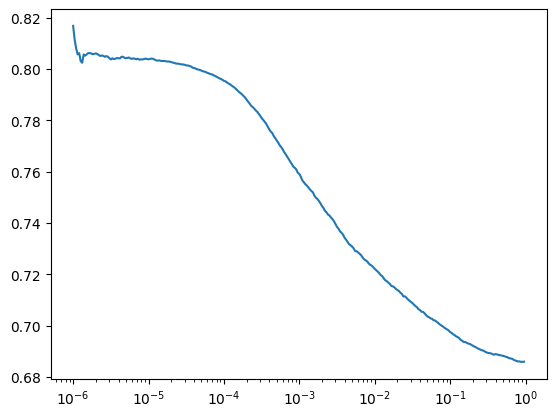

In [64]:
# """Finding optimal learning rate for 90:10 training data (I-UNet model)"""
# lr_find = LRFind(1e-6, 1, lr_finder_steps)
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train_, y_train))\
#                     .repeat()\
#                     .shuffle(len(X_train_))\
#                     .batch(BATCH_SIZE)
# model.fit(
#     train_dataset,
#     steps_per_epoch=lr_finder_steps,
#     epochs=EPOCHS,
#     callbacks=[lr_find]
# )

# plt.plot(lr_find.lrs, lr_find.losses)
# plt.xscale('log')
# plt.show()

In [65]:
# '''Finding optimal learning rate using LR finder - Method 2'''

# from keras_lr_finder import LRFinder

In [66]:
# class LRFinder:
#     """
#     Learning rate range test detailed in Cyclical Learning Rates for Training
#     Neural Networks by Leslie N. Smith. The learning rate range test is a test
#     that provides valuable information about the optimal learning rate. During
#     a pre-training run, the learning rate is increased linearly or
#     exponentially between two boundaries. The low initial learning rate allows
#     the network to start converging and as the learning rate is increased it
#     will eventually be too large and the network will diverge.
#     """

#     def __init__(self, model):
#         self.model = model
#         self.losses = []
#         self.learning_rates = []
#         self.best_loss = 1e9

#     def on_batch_end(self, batch, logs):
#         lr = K.get_value(self.model.optimizer.lr)
#         self.learning_rates.append(lr)

#         loss = logs['loss']
#         self.losses.append(loss)

#         if batch > 5 and (math.isnan(loss) or loss > self.best_loss * 4):
#             self.model.stop_training = True
#             return

#         if loss < self.best_loss:
#             self.best_loss = loss

#         lr *= self.lr_mult
#         K.set_value(self.model.optimizer.lr, lr)

#     def find(self, dataset, start_lr, end_lr, epochs=1,
#              steps_per_epoch=None, **kw_fit):
#         if steps_per_epoch is None:
#             raise Exception('To correctly train on the datagenerator,'
#                             '`steps_per_epoch` cannot be None.'
#                             'You can calculate it as '
#                             '`np.ceil(len(TRAINING_LIST) / BATCH)`')

#         self.lr_mult = (float(end_lr) /
#                         float(start_lr)) ** (float(1) /
#                                              float(epochs * steps_per_epoch))
#         initial_weights = self.model.get_weights()

#         original_lr = K.get_value(self.model.optimizer.lr)
#         K.set_value(self.model.optimizer.lr, start_lr)

#         callback = LambdaCallback(on_batch_end=lambda batch,
#                                   logs: self.on_batch_end(batch, logs))

#         self.model.fit(dataset,
#                        epochs=epochs, callbacks=[callback], **kw_fit)
#         self.model.set_weights(initial_weights)

#         K.set_value(self.model.optimizer.lr, original_lr)

#     def get_learning_rates(self):
#         return(self.learning_rates)

#     def get_losses(self):
#         return(self.losses)

#     def get_derivatives(self, sma):
#         assert sma >= 1
#         derivatives = [0] * sma
#         for i in range(sma, len(self.learning_rates)):
#             derivatives.append((self.losses[i] - self.losses[i - sma]) / sma)
#         return derivatives

#     def get_best_lr(self, sma, n_skip_beginning=10, n_skip_end=5):
#         derivatives = self.get_derivatives(sma)
#         best_der_idx = np.argmin(derivatives[n_skip_beginning:-n_skip_end])
#         return self.learning_rates[n_skip_beginning:-n_skip_end][best_der_idx]

In [67]:
# #defining the batch size
# BATCH = 16

In [68]:
# train_ds = tf.data.Dataset.from_tensor_slices((X_train_, y_train))
# train_ds = train_ds.shuffle(buffer_size=len(X_train_))
# train_ds = train_ds.batch(BATCH)
# train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

# test_ds = tf.data.Dataset.from_tensor_slices((X_test_, y_test))
# test_ds = test_ds.batch(BATCH)
# test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE)

In [69]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m, jacard_coef])

In [70]:
# '''Find Learning Rate'''
# # Explore learning rate from start_lr to end_lr over five epochs
# STEPS_PER_EPOCH = np.ceil(len(X_train_) / BATCH)

In [71]:
# lr_finder = LRFinder(model)
# lr_finder.find(train_ds, start_lr=1e-6, end_lr=1, epochs=5,
#                steps_per_epoch=STEPS_PER_EPOCH)

Epoch 1/5
61/61 [==============================] - 1058s 17s/step - loss: 0.8027 - acc: 0.4868 - f1_m: 0.4518 - precision_m: 0.5077 - recall_m: 0.4114 - jacard_coef: 0.3212
Epoch 2/5
61/61 [==============================] - 892s 15s/step - loss: 0.7732 - acc: 0.5139 - f1_m: 0.4717 - precision_m: 0.5437 - recall_m: 0.4215 - jacard_coef: 0.3320
Epoch 3/5
61/61 [==============================] - 856s 14s/step - loss: 0.6534 - acc: 0.6399 - f1_m: 0.6231 - precision_m: 0.6779 - recall_m: 0.5882 - jacard_coef: 0.4012
Epoch 4/5
61/61 [==============================] - 860s 14s/step - loss: 0.6352 - acc: 0.6540 - f1_m: 0.6738 - precision_m: 0.6581 - recall_m: 0.7022 - jacard_coef: 0.4053
Epoch 5/5
61/61 [==============================] - 861s 14s/step - loss: 0.6608 - acc: 0.6217 - f1_m: 0.6347 - precision_m: 0.6230 - recall_m: 0.7261 - jacard_coef: 0.3929


In [72]:
# # Plot the loss curve and smooth it out with Simple Moving Average. 
# # The best learning rate is a value that is approximately in the middle of the sharpest downward slope.

# def plot_loss(n_skip_beginning=10, n_skip_end=5, x_scale='log'):
#     """
#     Plots the loss.
#     Parameters:
#         n_skip_beginning - number of batches to skip on the left.
#         n_skip_end - number of batches to skip on the right.
#         """
#     learning_rates = lr_finder.get_learning_rates()
#     losses = lr_finder.get_losses()

#     f, ax = plt.subplots()
#     ax.set_ylabel("loss")
#     ax.set_xlabel("learning rate (log scale)")
#     ax.plot(learning_rates[n_skip_beginning:-n_skip_end],
#             losses[n_skip_beginning:-n_skip_end])
#     ax.set_xscale(x_scale)
#     return(ax)

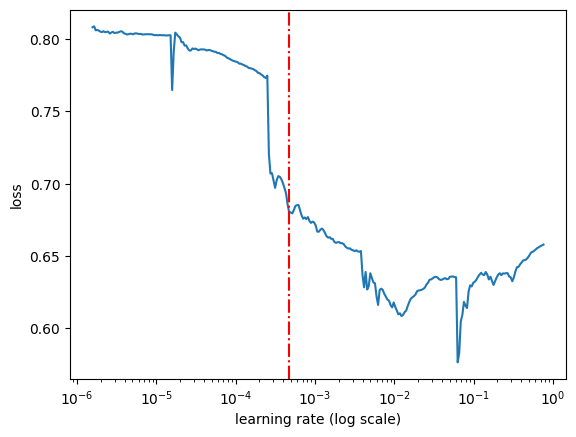

In [73]:
# axs = plot_loss()
# axs.axvline(x=lr_finder.get_best_lr(sma=20), c='r', linestyle='-.')

In [63]:
# from tensorflow.keras.optimizers import SGD, Adam

In [64]:
# adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [65]:
# #Custom BCE loss
# def BinaryCrossEntropy(y_true, y_pred): 
#     y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
#     term_0 = (1 - y_true) * K.log(1 - y_pred + K.epsilon())  
#     term_1 = y_true * K.log(y_pred + K.epsilon())
#     return -K.mean(term_0 + term_1, axis=0)

# print(BinaryCrossEntropy(
#     np.array([1., 1., 1.]).reshape(-1, 1), 
#     np.array([1., 1., 0.]).reshape(-1, 1)
#     ).numpy())

[5.14164949]


In [91]:
# Focal loss
# def focal_loss_with_logits(logits, targets, alpha, gamma, y_pred):
#     weight_a = alpha * (1 - y_pred) ** gamma * targets
#     weight_b = (1 - alpha) * y_pred ** gamma * (1 - targets)

#     return (tf.math.log1p(tf.exp(-tf.abs(logits))) + tf.nn.relu(-logits)) * (weight_a + weight_b) + logits * weight_b

# def focal_loss(y_true, y_pred):
#     y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
#     logits = tf.math.log(y_pred / (1 - y_pred))
#     loss = focal_loss_with_logits(logits=logits, targets=y_true, alpha=alpha, gamma=gamma, y_pred=y_pred)
#     return tf.reduce_mean(loss)

In [65]:
# #Dice BCE loss

# def generalized_dice_coefficient(y_true, y_pred): 
#     smooth = 1.
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
#     return score

# def dice_loss(y_true, y_pred):
#     loss = 1 - generalized_dice_coefficient(y_true, y_pred)
#     return loss

# def bce_dice_loss(y_true, y_pred):
#     loss = binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
#     return loss / 2.0

In [64]:
# #Dice coefficient log based IOU loss
# def dice_coef(y_true, y_pred):
#     smooth = 1.
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
#     return dice

# def dice_coef_log_loss(y_true, y_pred):
#     return -K.log(dice_coef(y_true, y_pred))

# # #or
# # def dice_coef_loss(y_true, y_pred):
# #     return -dice_coef(y_true, y_pred)
# # #or
# # def dice_coef_loss(y_true, y_pred):
# #     return 1 - dice_coef(y_true, y_pred)

In [94]:
# #Combo loss 1
# def ComboLoss(y_true, y_pred):    
#     smooth=1.
#     #flatten label and prediction tensors
#     inputs = K.flatten(y_pred)
#     targets = K.flatten(y_true)
    
#     BCE = binary_crossentropy(targets, inputs)
#     intersection = K.sum(targets * inputs)  
#     dice_loss = 1 - (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
#     Combo_Loss = BCE + dice_loss
    
#     return Combo_Loss

In [61]:
# #Combo loss based on BCE and dice coef log loss

# def dice_coef(y_true, y_pred):
#     smooth = 1.
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
#     return dice

# def dice_coef_log_loss(y_true, y_pred):
#     return -K.log(dice_coef(y_true, y_pred))

# def combo_loss(y_true, y_pred):
#     loss = binary_crossentropy(y_true, y_pred) + dice_coef_log_loss(y_true, y_pred)
#     return loss / 2.0

In [61]:
# #Combo loss based on BCE and dice coef log loss - anther loss function

# def dice_coef(y_true, y_pred):
#     smooth = 1.
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
#     return dice

# def dice_coef_log_loss(y_true, y_pred):
#     return -K.log(dice_coef(y_true, y_pred))

# def combo_loss(y_true, y_pred):
#     loss = binary_crossentropy(y_true, y_pred) + dice_coef_log_loss(y_true, y_pred)
#     return loss

In [66]:
# weights = [1.03, 0.97]

In [67]:
# #Weighted binary cross entropy

# def weighted_binary_crossentropy(weights):
#     def loss(y_true, y_pred):
#         # Compute binary crossentropy
#         bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)

#         # Apply weights to the crossentropy
#         weights_tensor = tf.constant(weights, dtype=tf.float32)
#         weights_for_batch = tf.reduce_sum(tf.cast(y_true, tf.float32) * weights_tensor, axis=-1)
#         weighted_bce = tf.reduce_mean(weights_for_batch * bce)

#         return weighted_bce

#     return loss

In [65]:
# def weighted_binary_dice_log_loss(nonbuilding_weight, building_weight):

#     def loss(y_true, y_pred):

#         # Calculate the dice loss
#         d_loss = dice_coef_log_loss(y_true, y_pred)

#         # Apply the weights
#         weight_vector = y_true * building_weight + (1. - y_true) * nonbuilding_weight
#         weighted_d_loss = weight_vector * d_loss

#         # Return the mean error
#         return tf.keras.backend.mean(weighted_d_loss)

#     return loss

In [66]:
# loss_function = weighted_binary_dice_log_loss(nonbuilding_weight, building_weight)

In [65]:
len(model.trainable_variables)

26

In [66]:
from tensorflow.keras.optimizers import SGD, Adam

In [67]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [68]:
model.compile(optimizer=adam, loss=loss_function, metrics=['acc',f1_m,precision_m, recall_m, jacard_coef, dice_coef])

In [69]:
# checkpoint
filepath = r'final year project thesis/trained models/I-UNet_8020_frozenUN_LIncB_A0.001_WBCE(7:3)_BS8_E50_initailized_2.hdf5'

In [70]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only = True)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)
callbacks_list = [checkpoint]

In [71]:
initial_epochs = 50
history = model.fit(X_train_, y_train,
                    batch_size=8,
                    verbose=1,
                    epochs=initial_epochs,
                    validation_data=(X_test_, y_test),
                    callbacks=callbacks_list,
                    shuffle=True)
len(history.history['val_acc'])

Epoch 1/50
108/108 [==============================] - ETA: 0s - loss: 0.5715 - acc: 0.6255 - f1_m: 0.7034 - precision_m: 0.5911 - recall_m: 0.8899 - jacard_coef: 0.4613 - dice_coef: 0.6276
Epoch 1: val_acc improved from -inf to 0.62650, saving model to final year project thesis/trained models/I-UNet_8020_frozenUN_LIncB_A0.001_WBCE(7:3)_BS8_E50_initailized_2.hdf5
108/108 [==============================] - 637s 6s/step - loss: 0.5715 - acc: 0.6255 - f1_m: 0.7034 - precision_m: 0.5911 - recall_m: 0.8899 - jacard_coef: 0.4613 - dice_coef: 0.6276 - val_loss: 0.5576 - val_acc: 0.6265 - val_f1_m: 0.7139 - val_precision_m: 0.5804 - val_recall_m: 0.9448 - val_jacard_coef: 0.4786 - val_dice_coef: 0.6438
Epoch 2/50
108/108 [==============================] - ETA: 0s - loss: 0.5305 - acc: 0.6664 - f1_m: 0.7340 - precision_m: 0.6197 - recall_m: 0.9211 - jacard_coef: 0.4899 - dice_coef: 0.6540
Epoch 2: val_acc improved from 0.62650 to 0.68417, saving model to final year project thesis/trained models/

50

In [72]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

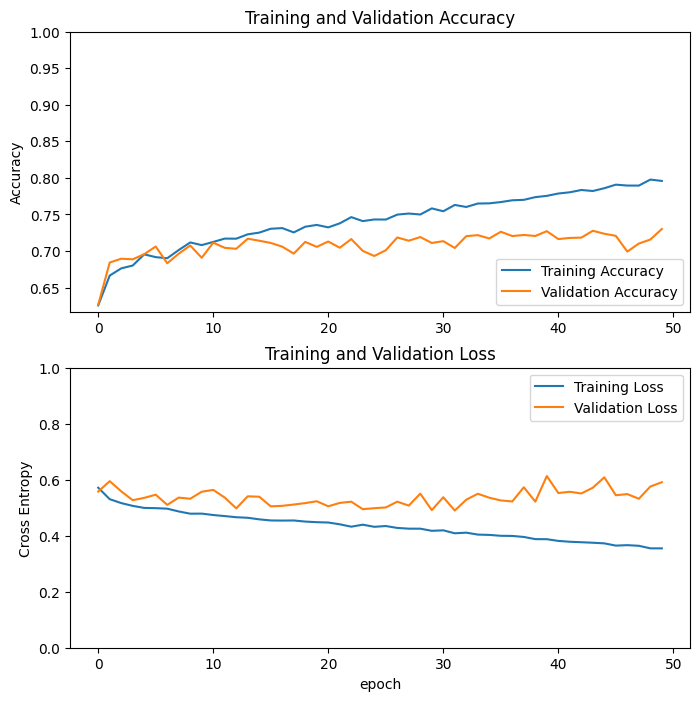

In [73]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#plot the training and validation loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [ ]:
#plot the training and validation accuracy at each epoch
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [ ]:
# #Load previously saved model
# from keras.models import load_model
# model = load_model(r'final year project thesis/trained models/I-UNet_8020_frozenUN_Adam_WBCE(7:3)_BS8_E25.hdf5', compile=False)

In [90]:
# #IOU
# y_pred=model.predict(X_test_)
# y_pred_thresholded = y_pred > 0.5

7/7 [==============================] - 60s 8s/step


In [91]:
# from tensorflow.keras.metrics import MeanIoU

In [92]:
# n_classes = 2
# IOU_keras = MeanIoU(num_classes=n_classes)  
# IOU_keras.update_state(y_pred_thresholded, y_test)
# print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.50801736


In [ ]:
# threshold = 0.5
# test_img_number = random.randint(0, len(X_test_)-1)
# test_img = X_test_[test_img_number]
# ground_truth=y_test[test_img_number]
# test_img_input=np.expand_dims(test_img, 0)
# print(test_img_input.shape)
# prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
# print(prediction.shape)

# plt.figure(figsize=(16, 8))
# plt.subplot(231)
# plt.title('Testing Image')
# plt.imshow(test_img[:,:,0], cmap='gray')
# plt.subplot(232)
# plt.title('Testing Label')
# plt.imshow(ground_truth[:,:,0], cmap='gray')
# plt.subplot(233)
# plt.title('Prediction on test image')
# plt.imshow(prediction, cmap='gray')

# plt.show()

In [ ]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

In [ ]:
# # see total number of trainable weights in saved model
# # and which layers in the saved model are trainable
# print("Total trainable weights: {}".format(len(model.trainable_weights)))
# model.trainable_weights

In [ ]:
# # preview architecture of model, taking note of param totals
# model.summary()

In [ ]:
"""Fine-tuning the model"""

In [ ]:
# # freeze base, with exception of the last layer
# set_trainable = False
# for layer in model.layers[0].layers:
#     if layer.name == 'block5_conv4':
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

In [ ]:
# # sanity check on trainable/untrainable params in base
# tl_cnn_model_2.layers[0].summary()

In [ ]:
# # yet another sanity check, to ensure that only the last
# # layer of base and the densely connected layers are trainable
# print("Total trainable weights: {}".format(len(tl_cnn_model_2.trainable_weights)))
# tl_cnn_model_2.trainable_weights

In [74]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(inception_updated.layers):
    print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [75]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

In [76]:
# Fine Tuning Approach
# In the feature extraction experiment, you were only training a few layers on top of an 
# InceptionV3 base model. The weights of the pre-trained network were not updated during training.


# One way to increase performance even further is to train (or "fine-tune") the weights of the
# top layers of the pre-trained model alongside the training of the classifier you added. 
# The training process will force the weights to be tuned from generic feature maps to 
# features associated specifically with the dataset.

# Unfreeze the top layers of the model

inception_updated.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(inception_updated.layers))

# Fine-tune from this layer onwards
fine_tune_at = 165

# Freeze all the layers before the `fine_tune_at` layer
for layer in inception_updated.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  311


In [103]:
# # we chose to train the top 2 inception blocks, i.e. we will freeze
# # the first 164 layers and unfreeze the rest:
# #method 1
# for layer in model.layers[:164]:
#     layer.trainable = False
# for layer in model.layers[164:]:
#     layer.trainable = True

In [ ]:
# print("Total trainable weights: {}".format(len(model.trainable_weights)))
# model.trainable_weights

In [ ]:
# #method 2
# for layer in baseModel.layers[config.unfreeze_layer:]:
# 	layer.trainable = True

In [ ]:
# # method 3

# base_model.trainable = True
# # Let's take a look to see how many layers are in the base model
# print("Number of layers in the base model: ", len(base_model.layers))

# # Fine-tune from this layer onwards
# fine_tune_at = 126

# ### START CODE HERE

# ##### One Way ########
# """
# for layer in base_model.layers:
#     if layer.name == 'block_16_expand':
#         break
#     layer.trainable = False
#     print('Layer ' + layer.name + ' frozen.')
# """
# ######## Other Way ######
# # Freeze all the layers before the `fine_tune_at` layer
# for layer in base_model.layers[:fine_tune_at]:
#     #print('Layer ' + layer.name + ' frozen.')
#     layer.trainable = None

In [77]:
from tensorflow.keras.optimizers import SGD, Adam

In [78]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

In [79]:
model.compile(optimizer=adam, loss=loss_function, metrics=['acc',f1_m,precision_m, recall_m, jacard_coef, dice_coef])

In [80]:
model.summary()

Model: "I-UNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 255, 255, 32  1440        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 255, 255, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                            

In [81]:
len(model.trainable_variables)

72

In [79]:
# # checkpoint
# filepath_ = r'trained models/I-UNet_8020_frozenUN_Adam_WBCE(7:3)_BS16_E50_100_finetuned.hdf5'

In [80]:
# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
# earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)
# callbacks_list = [checkpoint]

In [82]:
#Continue training the model

fine_tune_epochs = 50
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(X_train_, y_train,
                         batch_size=8,
                         verbose=1,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=(X_test_, y_test))
#                          callbacks=callbacks_list,
#                          shuffle=True)
# len(history.history['val_acc'])

Epoch 50/100
108/108 [==============================] - 706s 6s/step - loss: 0.5302 - acc: 0.6752 - f1_m: 0.7397 - precision_m: 0.6242 - recall_m: 0.9300 - jacard_coef: 0.5012 - dice_coef: 0.6627 - val_loss: 1.0588 - val_acc: 0.6622 - val_f1_m: 0.6914 - val_precision_m: 0.6348 - val_recall_m: 0.7752 - val_jacard_coef: 0.4559 - val_dice_coef: 0.6214
Epoch 51/100
108/108 [==============================] - 643s 6s/step - loss: 0.4942 - acc: 0.7006 - f1_m: 0.7558 - precision_m: 0.6462 - recall_m: 0.9293 - jacard_coef: 0.5215 - dice_coef: 0.6811 - val_loss: 0.5913 - val_acc: 0.6890 - val_f1_m: 0.7442 - val_precision_m: 0.6299 - val_recall_m: 0.9201 - val_jacard_coef: 0.5086 - val_dice_coef: 0.6711
Epoch 52/100
108/108 [==============================] - 572s 5s/step - loss: 0.4633 - acc: 0.7332 - f1_m: 0.7748 - precision_m: 0.6795 - recall_m: 0.9160 - jacard_coef: 0.5422 - dice_coef: 0.7001 - val_loss: 0.5164 - val_acc: 0.7303 - val_f1_m: 0.7520 - val_precision_m: 0.6965 - val_recall_m: 0.83

In [83]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

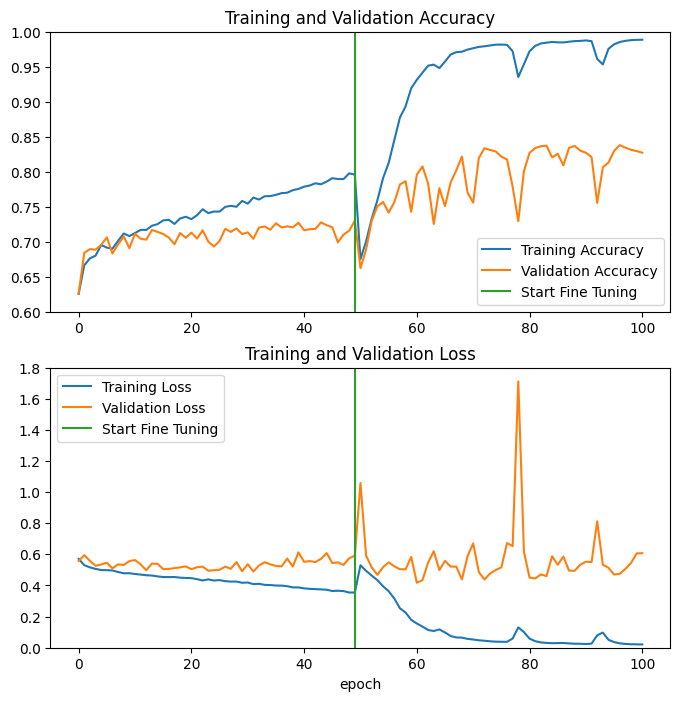

In [86]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.6, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.8])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [87]:
#Save the model for future use
model.save(r'trained models/I-UNet_8020_frozenUN_LIncB_A0.001_WBCE(7:3)_BS8_E50_100_finetuned.hdf5')

In [88]:
#Load previously saved model
from keras.models import load_model
model = load_model(r'trained models/I-UNet_8020_frozenUN_LIncB_A0.001_WBCE(7:3)_BS8_E50_100_finetuned.hdf5', compile=False)

In [89]:
#IOU
y_pred=model.predict(X_test_)
y_pred_thresholded = y_pred > 0.5

7/7 [==============================] - 31s 4s/step


In [90]:
from tensorflow.keras.metrics import MeanIoU

In [91]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.6315774


(1, 512, 512, 5, 1)
1/1 [==============================] - 0s 194ms/step
(512, 512)


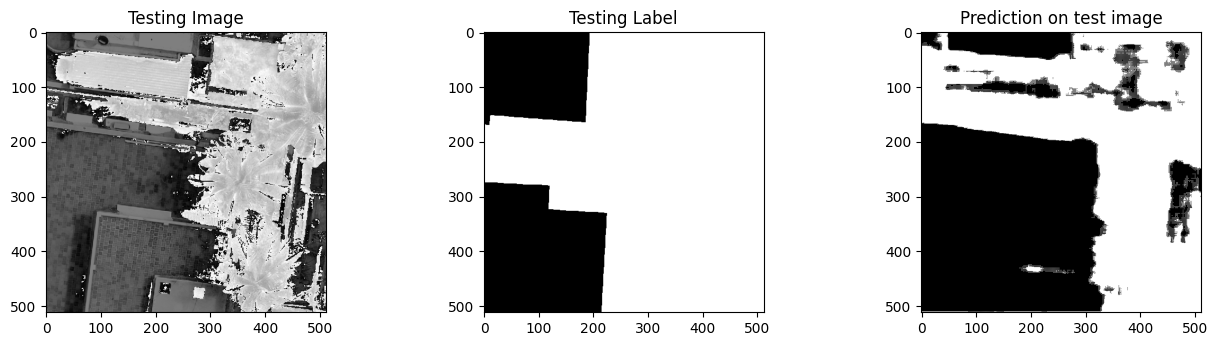

In [104]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test_)-1)
test_img = X_test_[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

In [105]:
# checkpoint
filepath = r'final year project thesis/trained models/I-UNet_8020_frozenUN_Adam_WBCE(7:3)_BS8_E50.hdf5'

In [106]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=10)
callbacks_list = [checkpoint]

In [107]:
finetune_epochs = 25
total_epochs = initial_epochs + finetune_epochs
history = model.fit(X_train_, y_train,
                    batch_size=8,
                    verbose=1,
                    epochs=total_epochs,
                    validation_data=(X_test_, y_test),
                    callbacks=callbacks_list,
                    shuffle=True)
len(history.history['val_acc'])

Epoch 1/50
  6/108 [>.............................] - ETA: 14:29 - loss: 0.5121 - acc: 0.6254 - f1_m: 0.6693 - precision_m: 0.5287 - recall_m: 0.9389 - jacard_coef: 0.4396 - dice_coef: 0.6068


KeyboardInterrupt



In [ ]:
# from keras.losses import binary_crossentropy  

In [ ]:
# def dice_coef(y_true, y_pred, smooth=1):
#     intersection = K.sum(y_true * y_pred, axis=[1,2,3])
#     union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
#     return K.mean( (2. * intersection + smooth) / (union + smooth), 
#     axis=0)

# def dice_p_bce(in_gt, in_pred):
#     return 1e-3*binary_crossentropy(in_gt, in_pred) - dice_coef(in_gt, 
#     in_pred)

# def true_positive_rate(y_true, y_pred):
#     return K.sum(K.flatten(y_true)*K.flatten(K.round(y_pred)))/K.sum(y_true) 

In [110]:
# model.compile(optimizer='adam', loss=dice_p_bce, metrics=['acc', 'binary_accuracy', f1_m, precision_m, recall_m, jacard_coef, dice_coef, true_positive_rate])

In [65]:
#Evaluating the model
score = model.evaluate(X_test_, y_test, verbose = 0) 
print('Val Loss:', score[0]) 
print('Val Accuracy:', score[1])
print('Val F1 score:', score[2])
print('Val Precision:', score[3])
print('Test Recall:', score[4])

Val Loss: 0.6579703092575073
Val Accuracy: 0.6675038933753967
Val F1 score: 0.740248441696167
Val Precision: 0.6077015995979309
Test Recall: 0.9511241912841797


In [43]:
#Save the model for future use
model.save(r'Final Year Project Thesis/Trained_Models/UNet_Building_100epochs.hdf5')

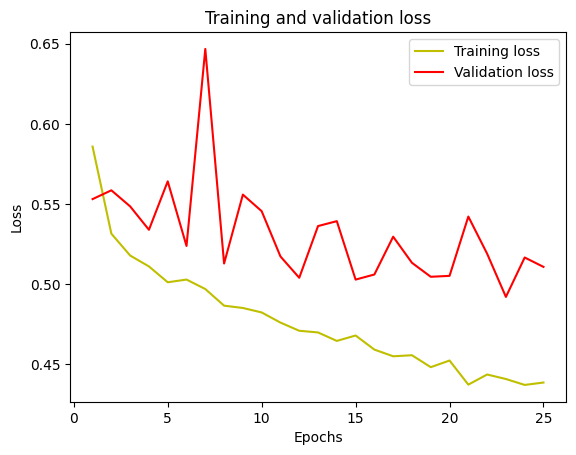

In [116]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

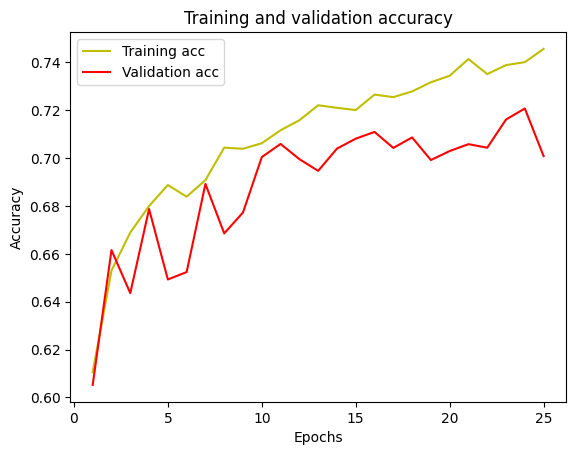

In [117]:
#plot the training and validation accuracy at each epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

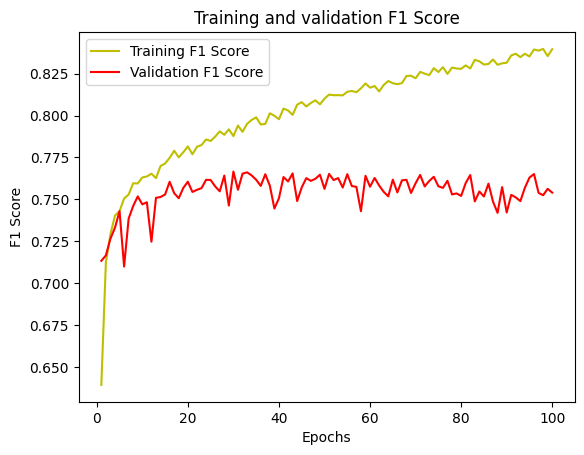

In [73]:
#plot the training and validation F1 Score at each epoch
f1_m = history.history['f1_m']
val_f1_m = history.history['val_f1_m']
plt.plot(epochs, f1_m, 'y', label='Training F1 Score')
plt.plot(epochs, val_f1_m, 'r', label='Validation F1 Score')
plt.title('Training and validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

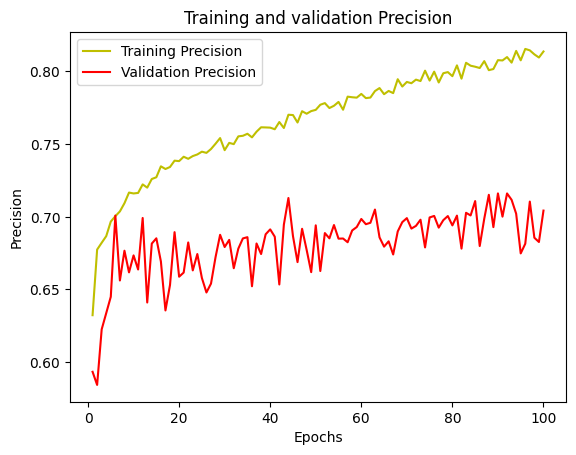

In [74]:
#plot the training and validation precision at each epoch
precision_m = history.history['precision_m']
val_precision_m = history.history['val_precision_m']
plt.plot(epochs, precision_m, 'y', label='Training Precision')
plt.plot(epochs, val_precision_m, 'r', label='Validation Precision')
plt.title('Training and validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

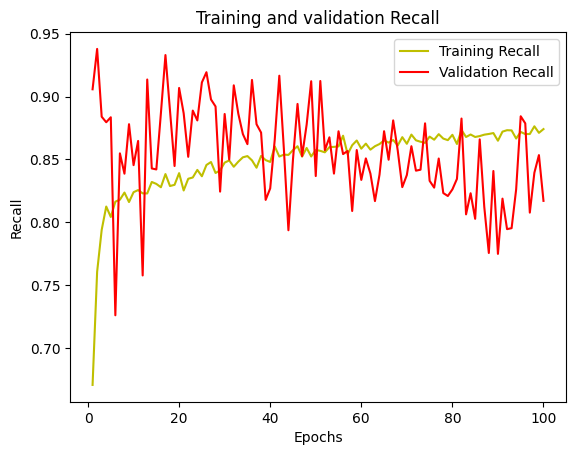

In [75]:
#plot the training and validation recall at each epoch
recall_m = history.history['recall_m']
val_recall_m = history.history['val_recall_m']
plt.plot(epochs, recall_m, 'y', label='Training Recall')
plt.plot(epochs, val_recall_m, 'r', label='Validation Recall')
plt.title('Training and validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [75]:
#Load previously saved model
from keras.models import load_model
model = load_model(r'final year project thesis/trained models/I-UNet_8020_22L_Adam_w_bdicelog_BS8_E50.hdf5', compile=False)

In [76]:
#IOU
y_pred=model.predict(X_test_)
y_pred_thresholded = y_pred > 0.5

7/7 [==============================] - 69s 9s/step


In [77]:
from tensorflow.keras.metrics import MeanIoU

In [78]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.5365485


(1, 512, 512, 5, 1)
1/1 [==============================] - 0s 418ms/step
(512, 512)


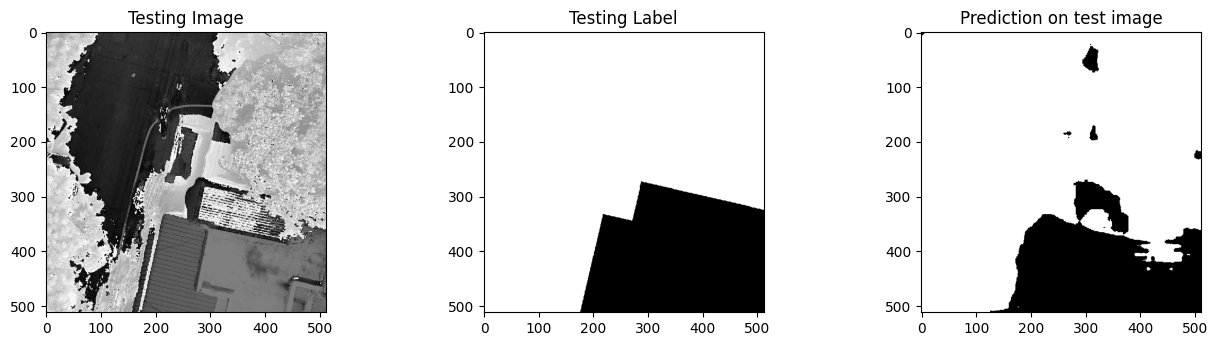

In [82]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test_)-1)
test_img = X_test_[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()